<a href="https://colab.research.google.com/github/ehpub/kfq_ML_2023/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

강의 교재 : https://wikibook.co.kr/pymlrev2/

In [ ]:
import numpy as np
def sigmoid(x):
  return 1 / (1 + np.e**(-x))

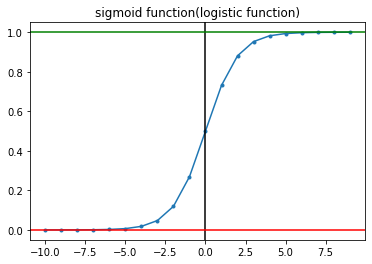

In [ ]:
import matplotlib.pyplot as plt
xs = range(-10,10)
ys = [sigmoid(x) for x in xs]
plt.plot(xs,ys,marker='.')
plt.axvline(x=0,color='black')
plt.axhline(y=0,color='red')
plt.axhline(y=1,color='green')
plt.title('sigmoid function(logistic function)')
plt.show()

In [ ]:
def gradient(y,x,w,b):
  wd = x*(sigmoid(w*x + b) - y)
  bd = sigmoid(w*x + b) - y
  return wd,bd

In [ ]:
def gradient_descent(xs,ys,lr=0.001,epochs=100):
  if isinstance(xs,list): #xs 형식이 리스트일 때
    xs = np.array(xs).reshape(-1) #numpy 배열로 변경하고 1차원으로 구조 변경
  wbhl=[] #학습 과정에서의 가중치와 편향을 보관하기 위함

  wp = np.random.uniform(-1,1) #초기 가중치
  bp = np.random.uniform(-1,1) #초기 편향

  for epoch in range(epochs):
    for i,x in enumerate(xs):
      wd,bd = gradient(ys[i],x,wp,bp)#경사를 구함
      wp = wp - (wd*lr) #가중치를 경사*lr만큼 빼기
      bp = bp - (bd*lr) #편향을 경사*lr만큼 빼기
    wbhl.append([wp,bp]) #가중치와 편향을 보관
  return wp, bp, wbhl #가중치, 편향, 히스토리 반환

In [ ]:
xs = np.arange(-10,10,0.3)
ys = np.array([1 if x>0 else 0 for x in xs])
wb, bp, wbhl = gradient_descent(xs,ys,epochs=1000)

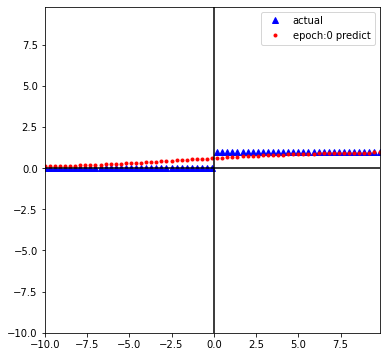

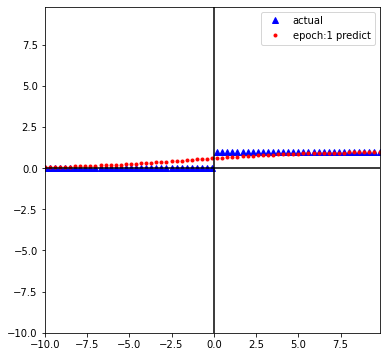

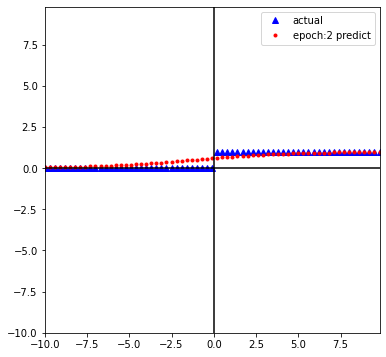

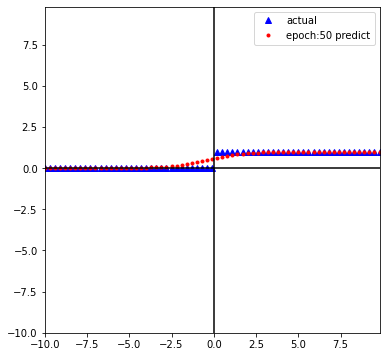

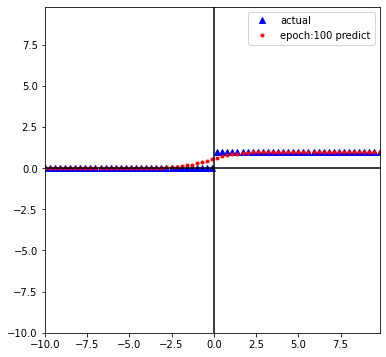

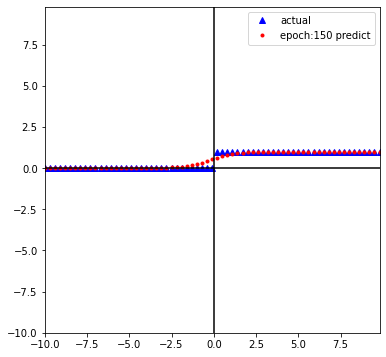

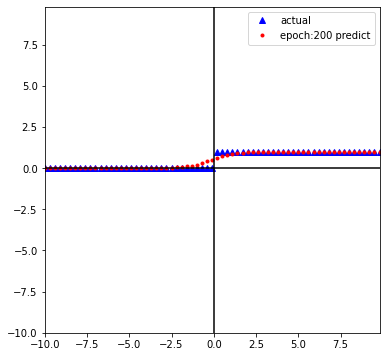

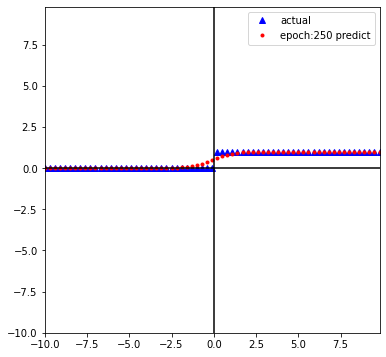

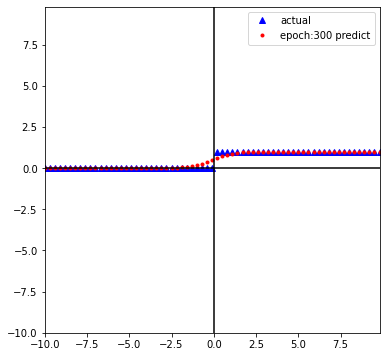

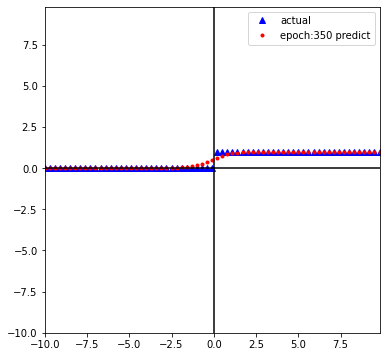

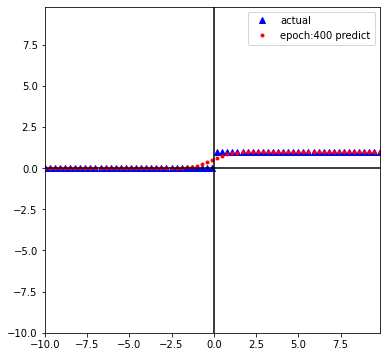

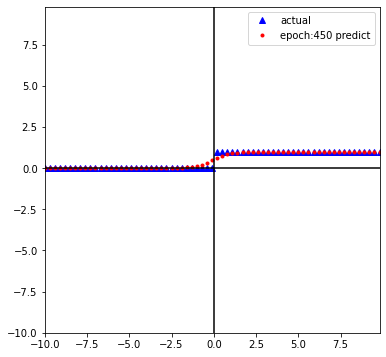

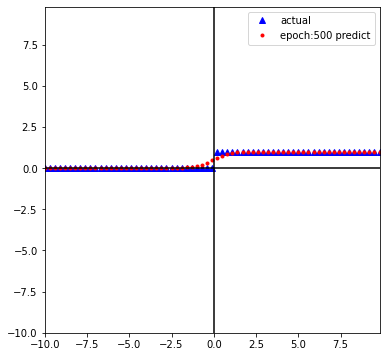

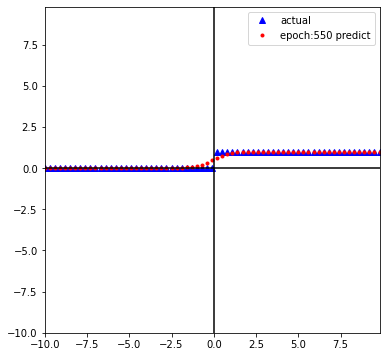

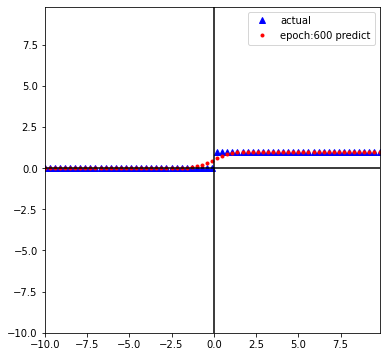

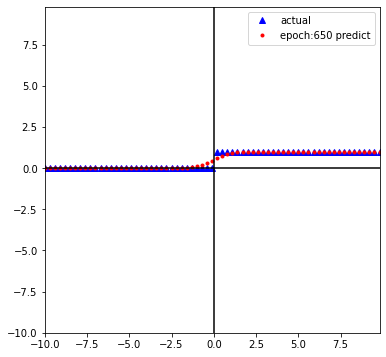

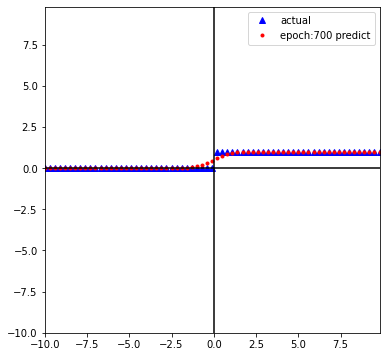

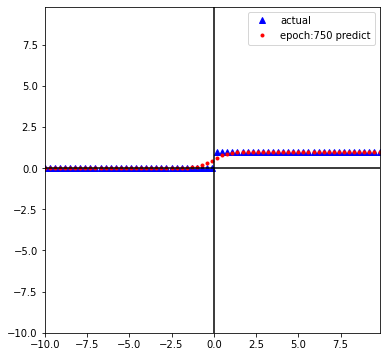

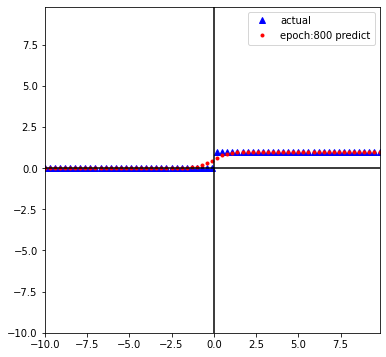

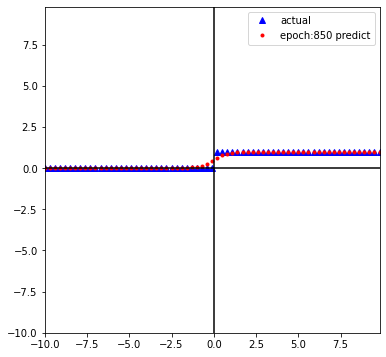

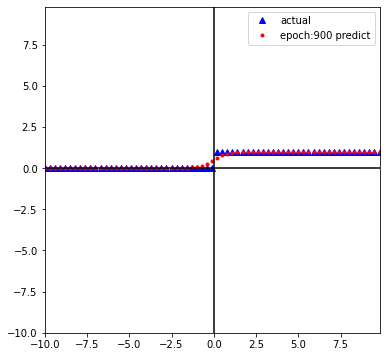

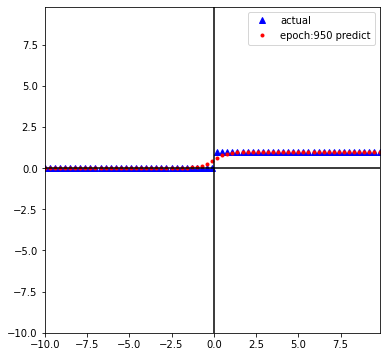

In [ ]:
min_val = min(min(xs),min(ys))
max_val = max(max(xs),max(ys))

for wi in range(len(wbhl)):
  if not (wi<3 or wi%50==0):
    continue
  wb = wbhl[wi]
  pre_ys = [sigmoid(wb[0]*x + wb[1]) for x in xs]
  plt.figure(figsize=(6,6))

  plt.plot(xs,ys,'b^',label='actual')
  plt.plot(xs,pre_ys,'r.',label=f"epoch:{wi} predict")
  plt.axvline(x=0,color='black')
  plt.axhline(y=0,color='black')

  plt.xlim(min_val,max_val)
  plt.ylim(min_val,max_val)
  plt.legend()
  plt.show()

In [ ]:
xs2 = [[x] for x in xs]
from sklearn.model_selection import train_test_split
train_xs,test_xs, train_ys,test_ys = train_test_split(xs2,ys)
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(train_xs,train_ys)

LogisticRegression(solver='liblinear')

In [ ]:
print(f"score:{lr_model.score(test_xs,test_ys)}")

score:1.0
